<h1>Numpy and Matplotlib<h1>

<h2>Part 1: Creating and Manipulating Arrays<h2>

First import numpy and matplotlib

In [2]:
import numpy as np
from matplotlib import pyplot as plt

1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan. Both should cover the range (-2, 2) and have 100 points in each direction.

In [3]:
y = np.linspace(-2,2,100)
x = np.linspace(-2,2,100)
xx, yy = np.meshgrid(x,y)
xx.shape, yy.shape

((100, 100), (100, 100))

1.2. Visualize each 2D array using pcolormesh

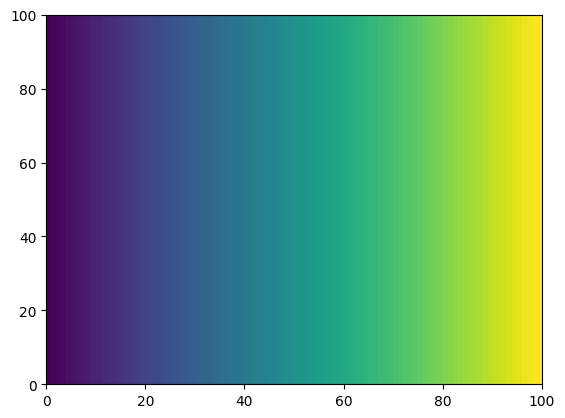

In [4]:
plt.pcolormesh(xx)


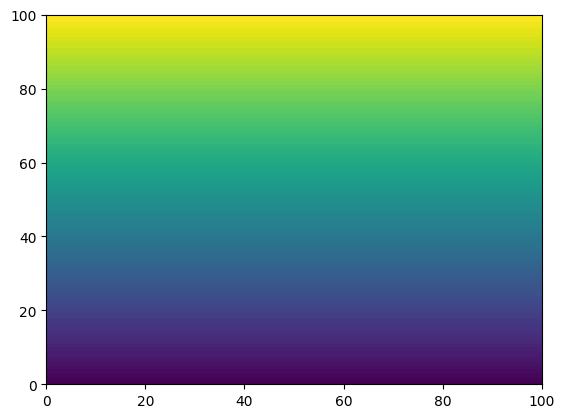

In [5]:
plt.pcolormesh(yy)

1.3 From your cartesian coordinates, create polar coordinates r
 and φ (phi = angle)

In [6]:
r = (xx ** (2) + yy ** (2)) ** (1/2)
phi = np.arctan2(xx, yy)

1.4. Visualize r and phi on the 2D x/y plane using pcolormesh

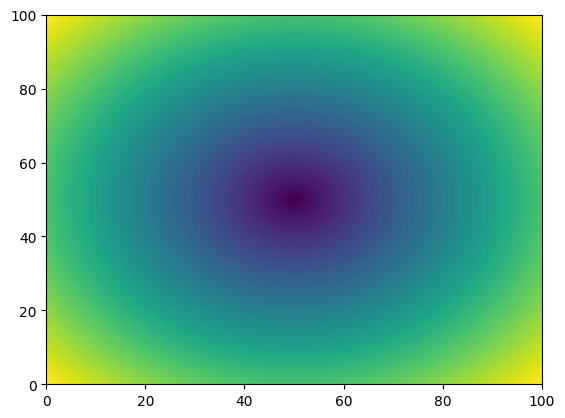

In [7]:
plt.pcolormesh(r)

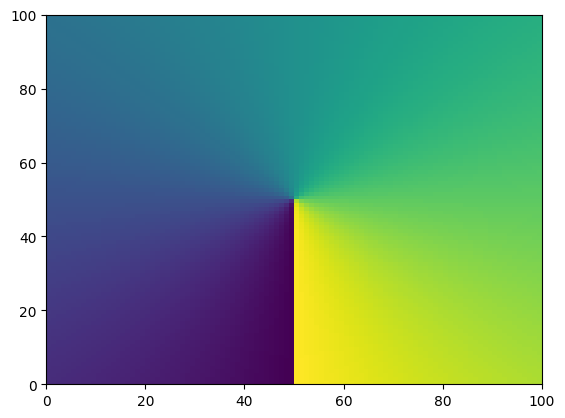

In [8]:
plt.pcolormesh(phi)

1.5 Calculate the quantity f = cos^2(4r) + sin^2(4phi) and plot it on the x,y plane

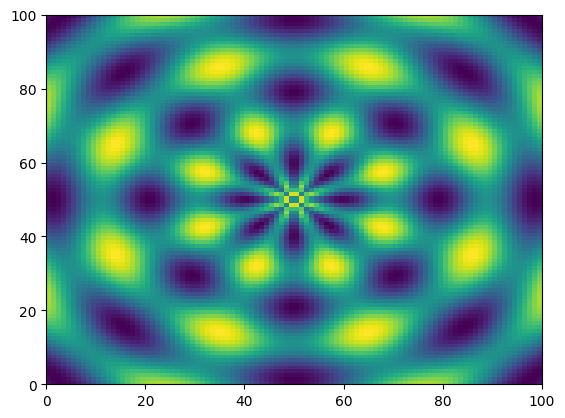

In [9]:
f = np.cos(4 * r) ** (2) + np.sin(4 * phi) ** (2)
plt.pcolormesh(f)

1.6 Plot the mean of f with respect to the x axis as a function of y

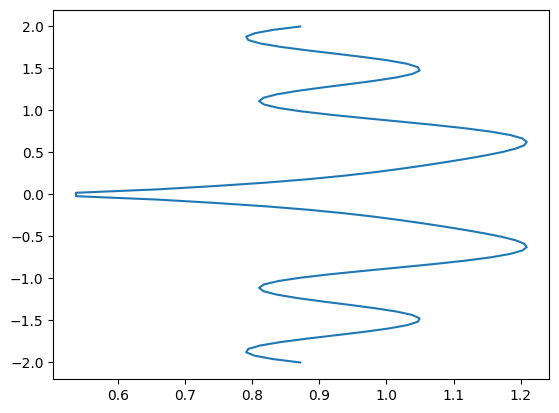

In [10]:
f_xmean = f.mean(axis = 1)
plt.plot(f_xmean, y)

1.7 Plot the mean of f with respect to the y axis as a function of x

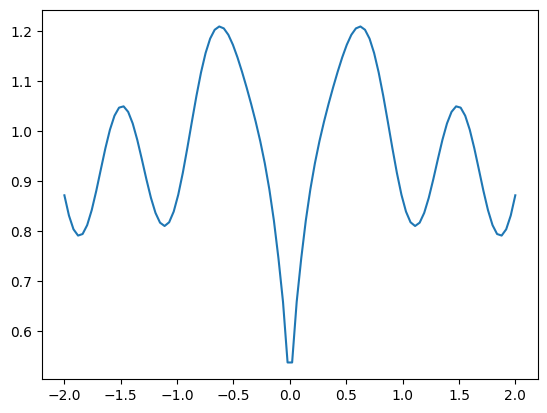

In [11]:
f_ymean = f.mean(axis = 0)
plt.plot(x, f_ymean)

1.8 Plot the mean of f with respect to phi as a function of r.  This is hard. You will need to define a discrete range of r values and then figure out how to average fwithin the bins defined by your grid. There are many different ways to accomplish this.

In [12]:
range = np.linspace(0, 5, 100) #discrete range of values



<h2> Part 2: Analyze ARGO Data<h2>

In [13]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

['C:\\Users\\panda\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\date.npy',
 'C:\\Users\\panda\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\lat.npy',
 'C:\\Users\\panda\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\levels.npy',
 'C:\\Users\\panda\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\Local\\pooch\\pooch\\Cache\\7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip\\float_data\\lon.npy',
 'C:\\Users\\panda\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalC

2.1 Load each data file as a numpy array.

In [14]:
T = np.load("T.npy") #temperature
s = np.load("S.npy") #salinity
P = np.load("P.npy") #pressure
date = np.load("date.npy") #date
lat = np.load("lat.npy") #latitude
lon = np.load("lon.npy") #longitude
level = np.load("levels.npy") #depth level

2.2 Examine the shapes of T, S and P compared to lon, lat, date and level. How do you think they are related? Based on the shapes, which dimensions do you think are shared among the arrays?

In [15]:
T.shape #output: (78,75)
s.shape #output: (78,75)
P.shape #output: (78,75)
lon.shape #output: (75,)
lat.shape #output:(75,)
date.shape #output: (75,)
level.shape #output: (78,)

(78,)

Temperature, salinity, and pressure all have the same shapes. Longitude, latitude, and date have the same shape. Level is different. This is probably because level is 3rd dimensional compared to the 2-D longitude and latitude measurements. Therefore level would have its own dimension and different elements in the array.

Longitude and latitude correspond with each other, therefore having the same elements in their array. The date also has 75 elements because it was measured with 75 dates (with 75 different lon/lat/diff placements)
 
The temperature, salinity, and pressure of the profile are affected by the longitude, latitude, and level. Because of that, I think that is why they obtain two dimensions with the first that contains 78 elements and the second that has 75 elements. 

2.3 Make a plot for each column of data in T, S and P (three plots). The vertical scale should be the levels data. Each plot should have a line for each column of data. It will look messy.

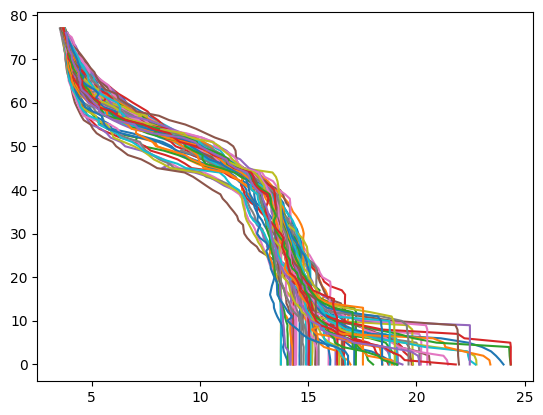

In [16]:
plt.plot(T, level)

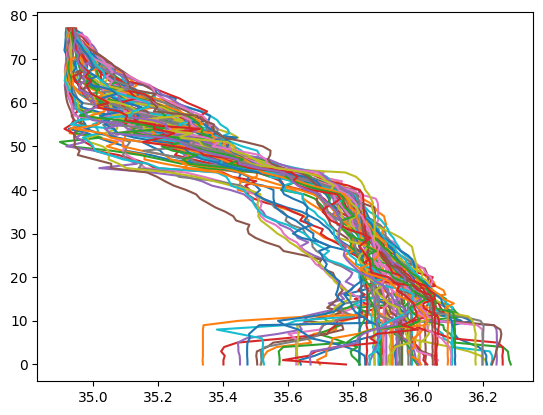

In [17]:
plt.plot(s, level)

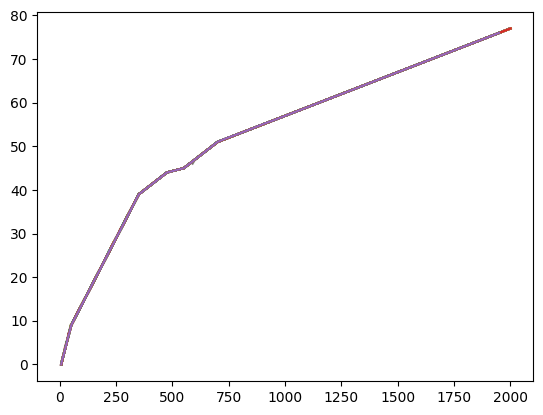

In [18]:
plt.plot(P, level)

2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level.

In [19]:
#do i have to iterate or does it alr calculate it at each depth
t_mean_list = []
t_std_list = []
s_mean_list = []
s_std_list = []
p_mean_list = []
p_std_list = []
#the thing is it's not taking mean at that point
for i in range(len(level)):
    t_mean = T[i].mean()
    t_mean_list.append(t_mean)
    t_std = T[i].std()
    t_std_list.append(t_std)
    s_mean = s[i].mean()
    s_std = s[i].std()
    p_mean = P[i].mean()
    p_std = P[i].std()
    s_mean_list.append(s_mean)
    s_std_list.append(s_std)
    p_mean_list.append(p_mean)
    p_std_list.append(p_std)

TypeError: 'numpy.ndarray' object is not callable

2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.

<ErrorbarContainer object of 3 artists>

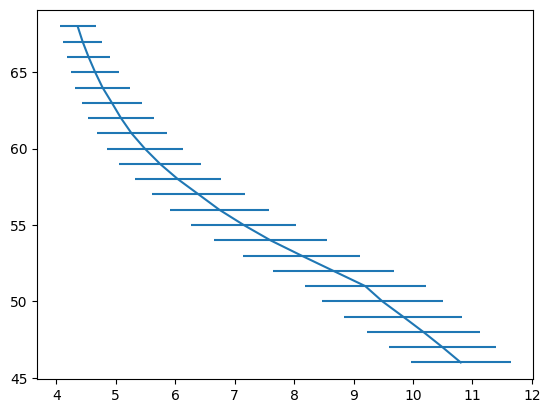

In [ ]:
# plt.plot(t_mean_list, level)
plt.errorbar(t_mean_list, level, xerr = t_std_list)

<ErrorbarContainer object of 3 artists>

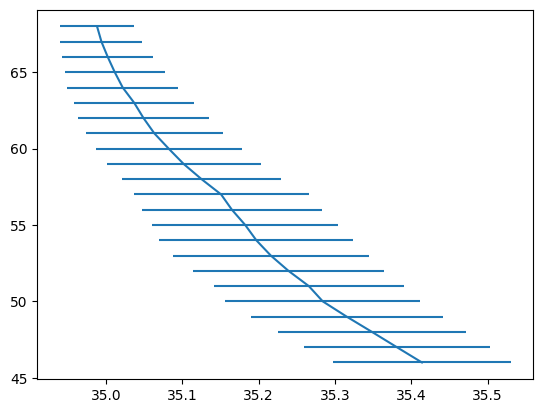

In [ ]:
plt.errorbar(s_mean_list, level, xerr = s_std_list)

<ErrorbarContainer object of 3 artists>

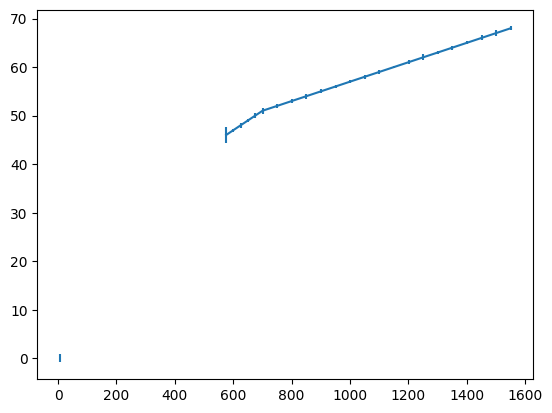

In [ ]:
plt.errorbar(p_mean_list, level, yerr = p_std_list)
#this one is so small how do i make it bigger

2.6 Account For Missing Data. The profiles contain many missing values. These are indicated by the special “Not a Number” value, or np.nan. When you take the mean or standard deviation of data with NaNs in it, the entire result becomes NaN. Instead, if you use the special functions np.nanmean and np.nanstd, you tell NumPy to ignore the NaNs. Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

In [ ]:
#prob should have wrote function for this
#did i do this wrong hmm
np.nanmean(T)
np.nanstd(T)
np.nanmean(s)
np.nanstd(s)
np.nanmean(P)
np.nanstd(P)
t_mean_list = []
t_std_list = []
s_mean_list = []
s_std_list = []
p_mean_list = []
p_std_list = []
for i in range(len(level)):
    t_mean = T[i].mean()
    t_mean_list.append(t_mean)
    t_std = T[i].std()
    t_std_list.append(t_std)
    s_mean = s[i].mean()
    s_std = s[i].std()
    p_mean = P[i].mean()
    p_std = P[i].std()
    s_mean_list.append(s_mean)
    s_std_list.append(s_std)
    p_mean_list.append(p_mean)
    p_std_list.append(p_std)

<ErrorbarContainer object of 3 artists>

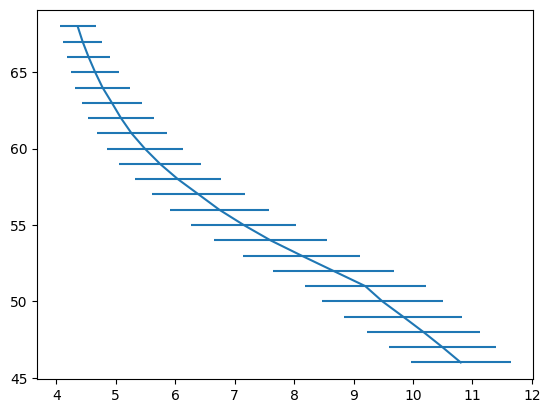

In [ ]:
plt.errorbar(t_mean_list, level, xerr = t_std_list)
#looks the same...

<ErrorbarContainer object of 3 artists>

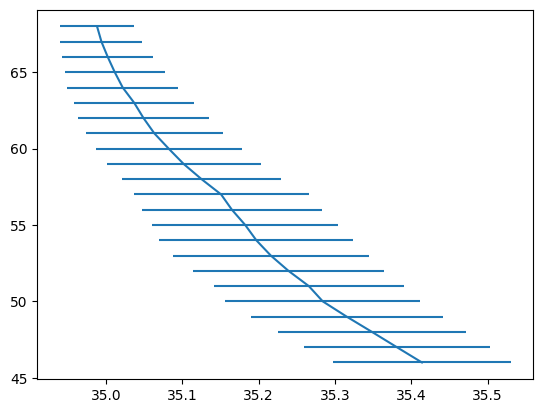

In [ ]:
plt.errorbar(s_mean_list, level, xerr = s_std_list)
#looks the same...

<ErrorbarContainer object of 3 artists>

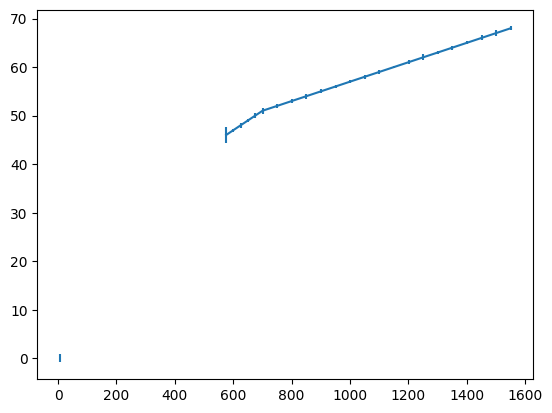

In [ ]:
plt.errorbar(p_mean_list, level, yerr = p_std_list)
#they all look the same

2.7 Create a scatter plot of the lon, lat positions of the ARGO float.

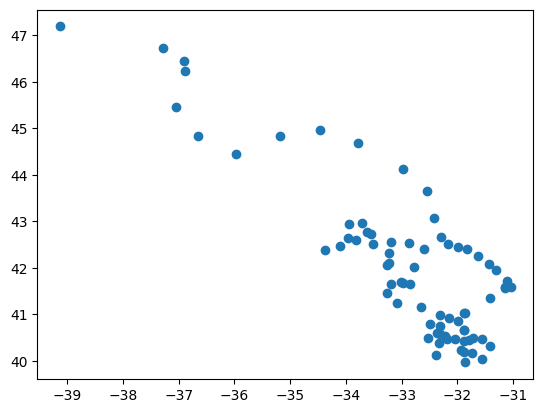

In [ ]:
plt.scatter(lon, lat)

NOTE: I don't think I did 2.4, 2.5, 2.6 correct. I still need to finish 1.8.